In [1]:
import sys
sys.path.append('../')

from src import *

2025-02-19 13:10:15.869219: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739981415.885619  137174 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739981415.896065  137174 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-19 13:10:15.927823: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = load_data('../data/processed/processed-scoliosis-dataset.csv')

Data loaded successfully.


In [3]:
X = df.drop(columns=['Name', 'Scolio', 'Class', 'individual_n'])
y = df['Class']
groups = df['individual_n']

In [4]:
X = scale_data(X)

Data scaled successfully.


In [6]:
X_train, y_train, X_test, y_test = stratified_group_split(X, y, groups)

  Train Distribution After: Counter({np.int64(0): 42, np.int64(1): 42})
  Test Distribution (Unchanged): Counter({0: 17, 1: 13})



In [7]:
X_train.shape

(84, 134)

In [8]:
model = build_mlp(X_train.shape[1])

I0000 00:00:1739981430.088106  137174 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4699 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1060 6GB, pci bus id: 0000:01:00.0, compute capability: 6.1


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        17,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,649 (108.00 KB)

 Trainable params: 27,649 (108.00 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.fit(X_train, y_train, epochs=10, batch_size=1, validation_split=0.2)

Epoch 1/10


I0000 00:00:1739981435.157373  137261 service.cc:148] XLA service 0x7fc55c003a50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739981435.157424  137261 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2025-02-19 13:10:35.292845: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1739981435.530671  137261 cuda_dnn.cc:529] Loaded cuDNN version 90300


31/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4551 - auc: 0.2907 - loss: 0.0608 - precision: 0.1278 - recall: 0.0911           

I0000 00:00:1739981436.251461  137261 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


67/67 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.4882 - auc: 0.3250 - loss: 0.0593 - precision: 0.2270 - recall: 0.2069 - val_accuracy: 0.6471 - val_auc: 0.0000e+00 - val_loss: 0.0438 - val_precision: 1.0000 - val_recall: 0.6471
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6023 - auc: 0.4377 - loss: 0.0547 - precision: 0.4602 - recall: 0.4335 - val_accuracy: 0.6471 - val_auc: 0.0000e+00 - val_loss: 0.0432 - val_precision: 1.0000 - val_recall: 0.6471
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4801 - auc: 0.3653 - loss: 0.0566 - precision: 0.3385 - recall: 0.4574 - val_accuracy: 0.5882 - val_auc: 0.0000e+00 - val_loss: 0.0432 - val_precision: 1.0000 - val_recall: 0.5882
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4562 - auc: 0.3163 - loss: 0.0606 - precision: 0.2029 - recall: 0.2011 - val_accuracy: 0.5882 - val_auc: 0.0000e+00 - val_loss: 0.0433 - val_precision: 1.0000 - val_recall: 0.5882
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━

In [10]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 753ms/step


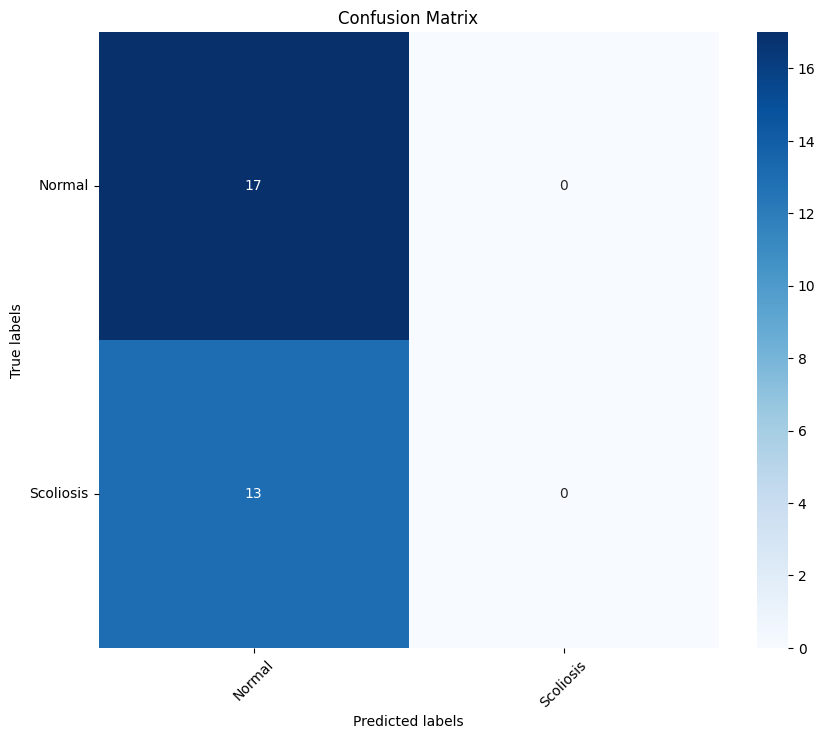

In [11]:
labels = ['Normal', 'Scoliosis']
plot_confusion_matrix(y_test, y_pred.argmax(axis=1), labels)

In [13]:
best_model = build_tuned_mlp(X_train, y_train, X_test, y_test, directory='BestModelSearch')

Trial 30 Complete [00h 00m 24s]
val_accuracy: 0.5083333402872086

Best val_accuracy So Far: 0.6333333402872086
Total elapsed time: 00h 12m 05s


In [14]:
best_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 48)             │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,601 (29.69 KB)

 Trainable params: 7,601 (29.69 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step


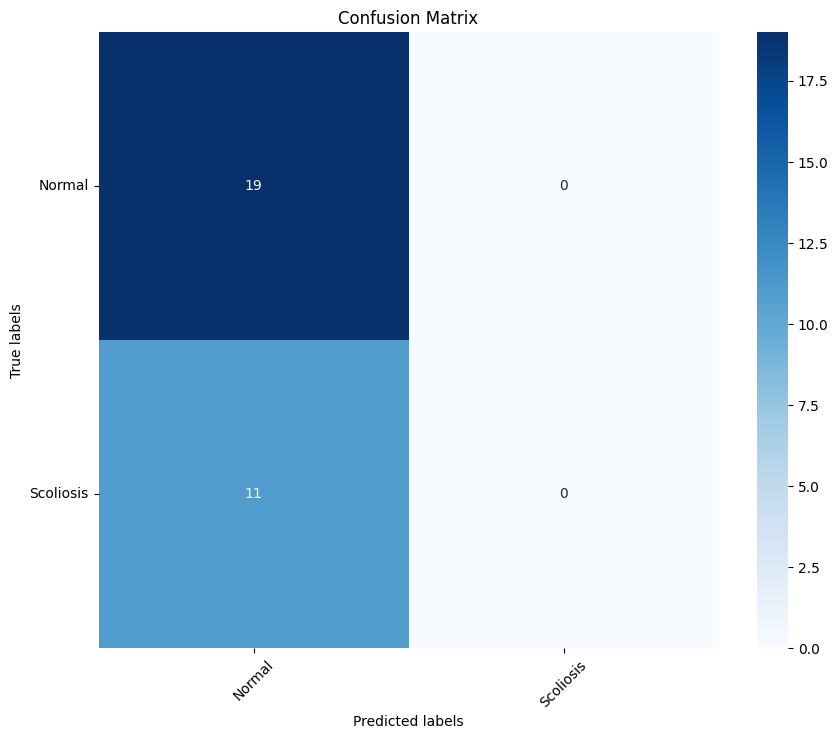

In [15]:
y_pred = best_model.predict(X_test)
plot_confusion_matrix(y_test, y_pred.argmax(axis=1), labels)